### 神经网络 拟合 线性回归

In [1]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

In [2]:
x = torch.linspace(-3, 3, 10000)
# unsqueeze, dim=1 在第一维增加一个维度
x = torch.unsqueeze(x,dim=1)
y = x + 1.2*torch.rand(x.size())

In [4]:
x.shape

torch.Size([10000, 1])

In [6]:
x0 = torch.ones(x.numpy().size)
x0 = torch.unsqueeze(x0, dim=1)
x0

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [8]:
X.numpy().shape

(10000, 2)

In [7]:
# 增加截距列
X = torch.cat((x, x0), dim=1)

In [ ]:
# 上一节梯度下降法 训练
def train(x, y, inputs, target, epochs=1, learning_rate=0.01):
    w = torch.rand(inputs.numpy().shape[1])
    w.requires_grad = True
    inputs_count = inputs.numpy().shape[0]
    for epoch in range(epochs):
        output = inputs.mv(w)
        loss = (output - target).pow(2).sum() / inputs_count
        loss.backward()
        w.data -= learning_rate * w.grad
        w.grad.zero_()
        if epoch % 80 == 0:
            draw(x, y, output, loss)
    return w, loss

In [10]:
def draw(x, y, output, loss):
    plt.cla()
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%s' % (loss.item()), fontdict={'size':20, 'color':'red'})
    plt.pause(0.005)

In [9]:
# 构造神经网络
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        # nn.Linear 线性神经网络模块 ,第一个参数输入的维度、第二个参数输出的维度 ，x,y 都是一维，所以 (1, 1)
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        # 前向传播计算步骤，相当于上一节的 out = inputs.mm(w)
        out = self.linear(x)
        return out

In [17]:
LR_model = LR()
inputs = x
target = y

- 均方误差损失函数 nn.MSELoss()
- 随机梯度下降法 optim.SGD(model.parameters(), lr=1e-4)，随机梯度下降法避免一次性加载全部数据导致内存溢出，还可以防止优化的时候陷入局部最小值

In [14]:
def train(x, y, inputs, target, model, epochs):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=1e-4)
    for epoch in range(epochs):
        output = model(inputs)
        # 计算损失函数
        loss = criterion(output, target)
        # 清空权重 grad 值
        optimizer.zero_grad()
        # 计算梯度
        loss.backward()
        # 权重值更新
        optimizer.step()
        if epoch % 200 == 0:
            draw(x, y, output, loss)
    return model, loss

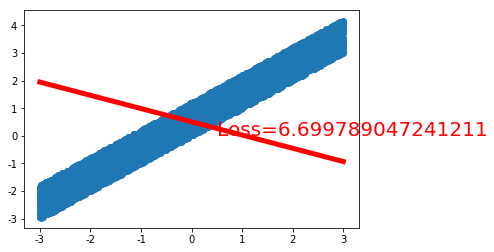

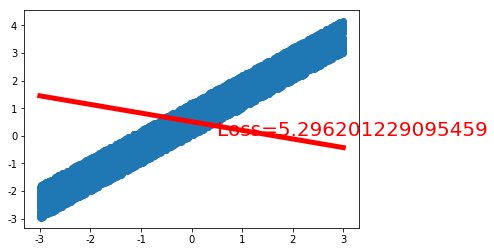

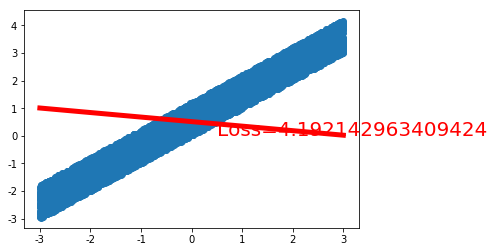

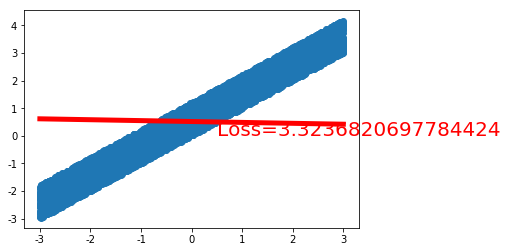

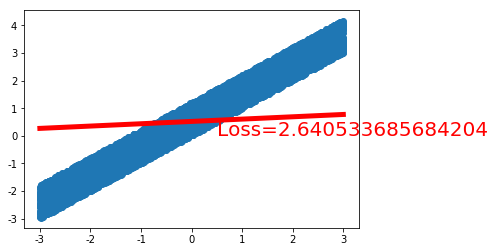

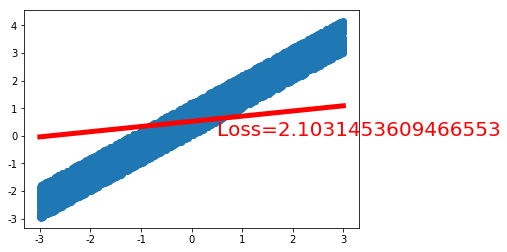

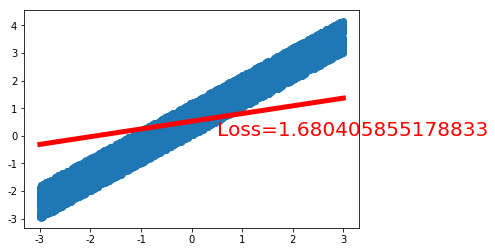

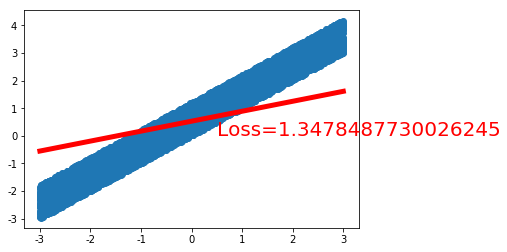

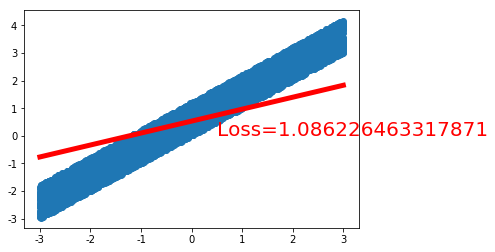

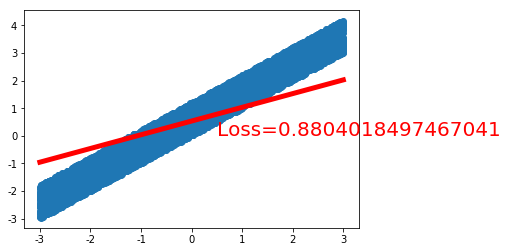

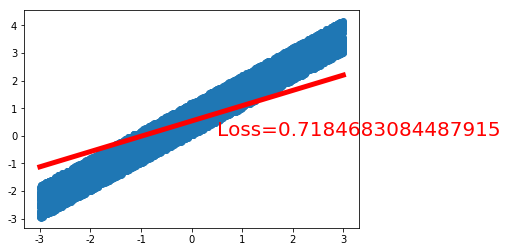

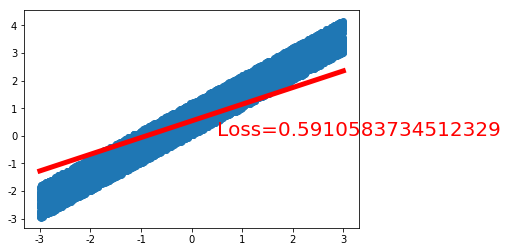

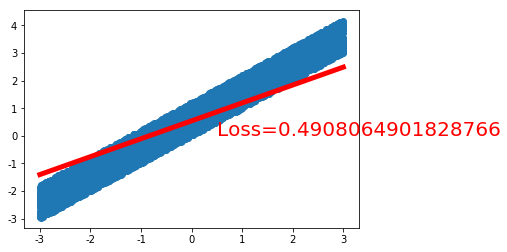

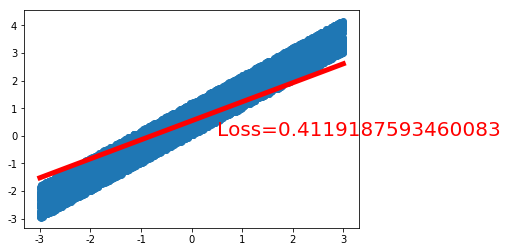

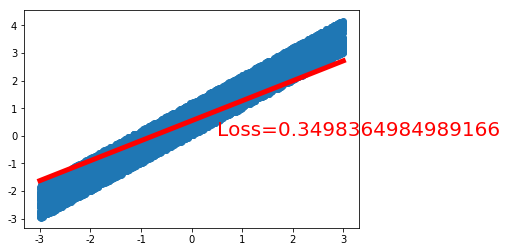

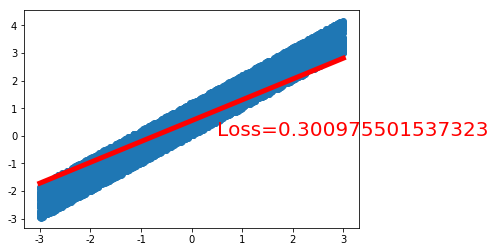

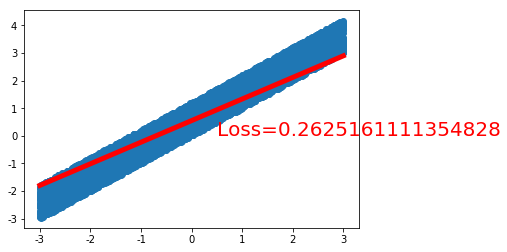

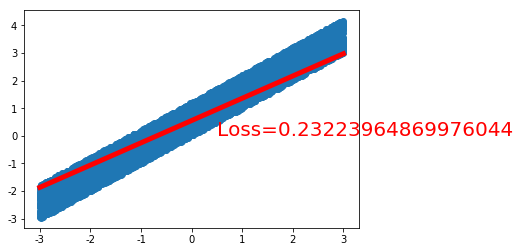

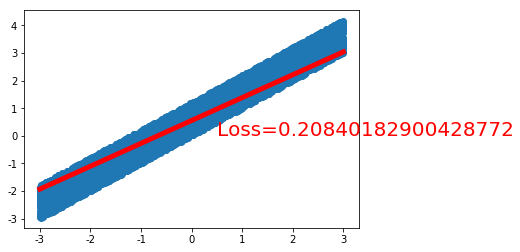

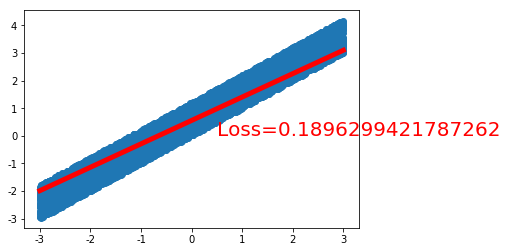

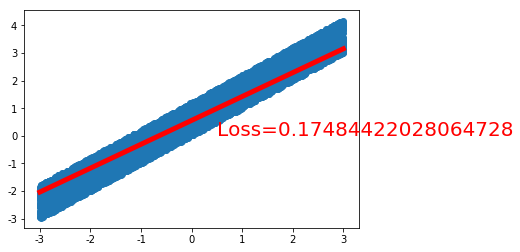

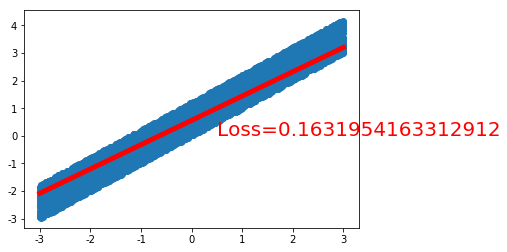

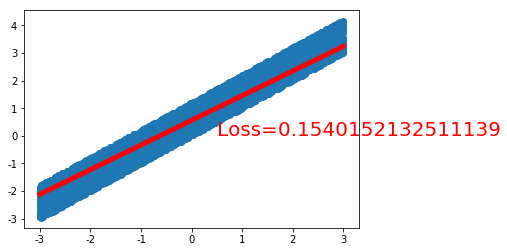

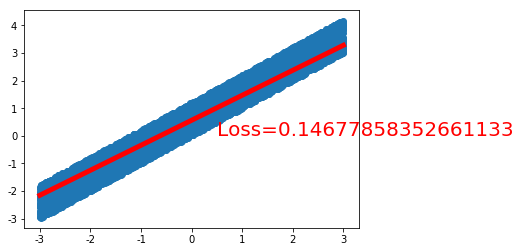

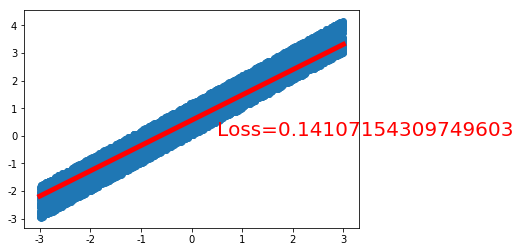

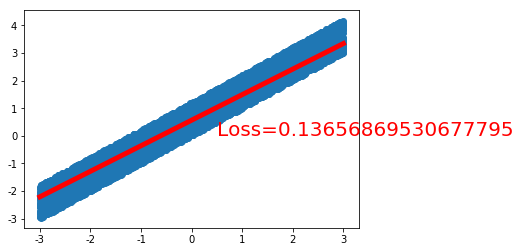

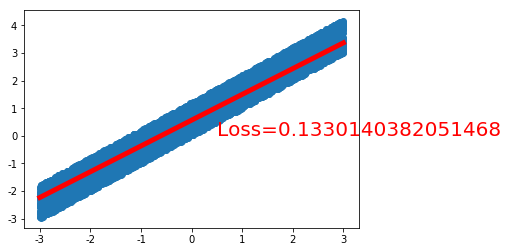

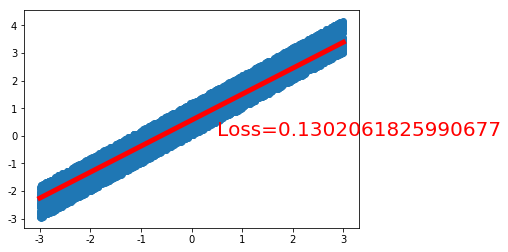

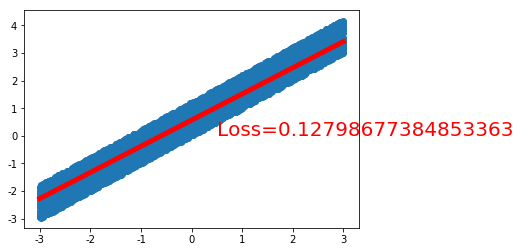

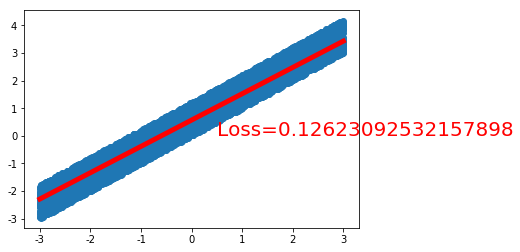

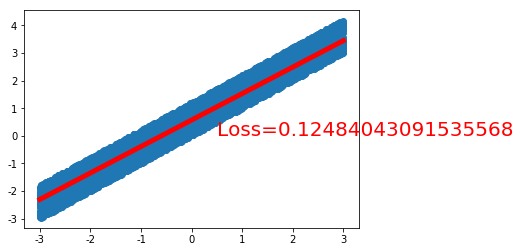

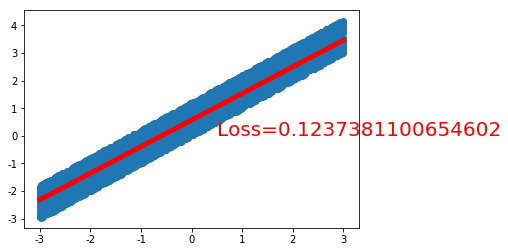

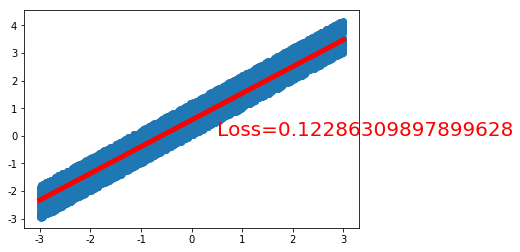

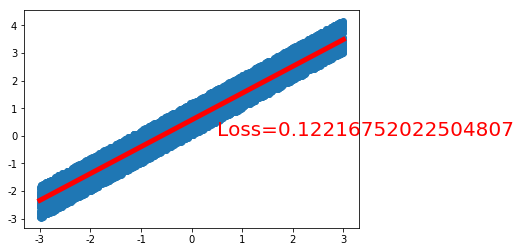

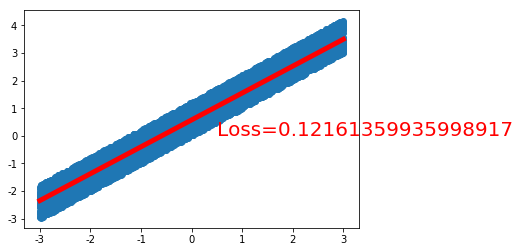

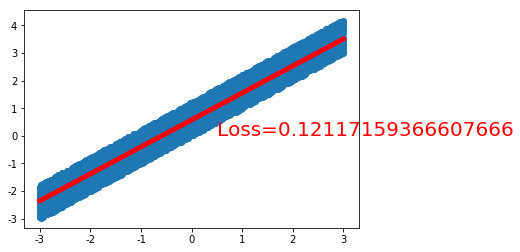

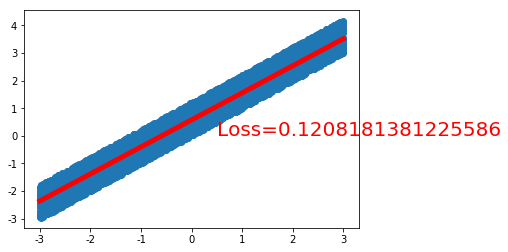

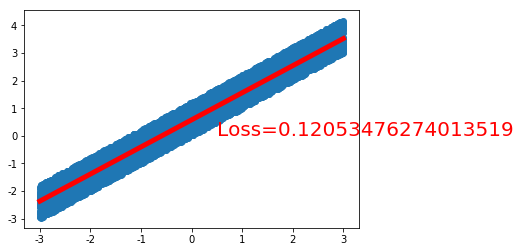

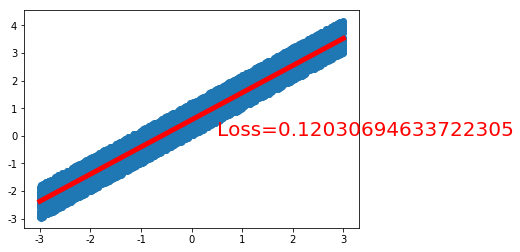

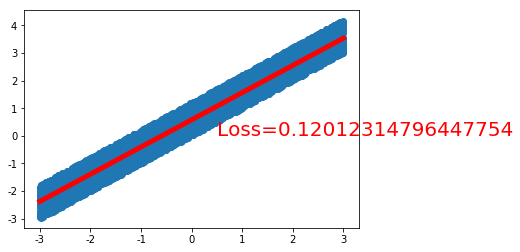

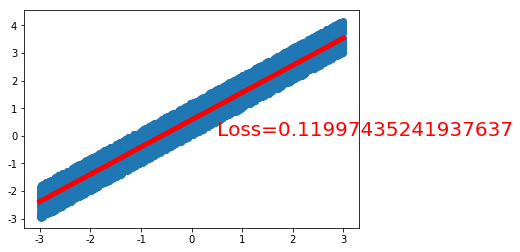

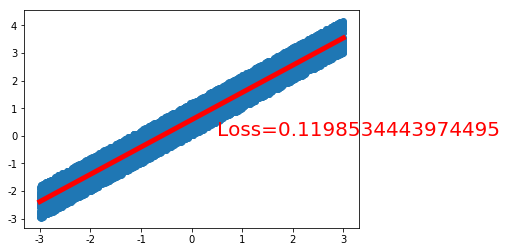

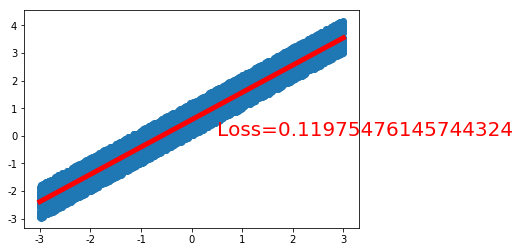

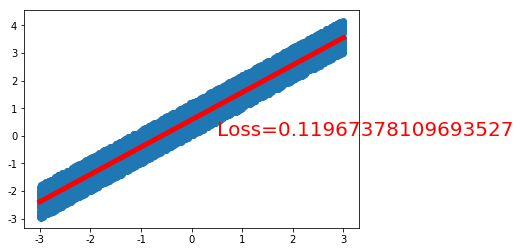

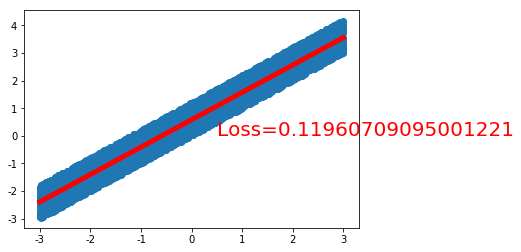

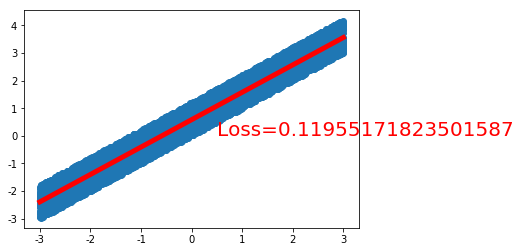

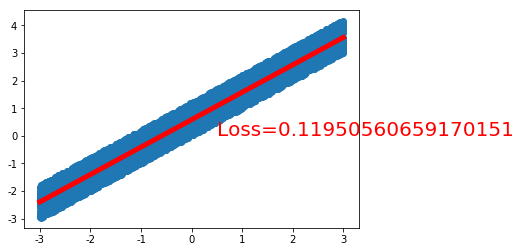

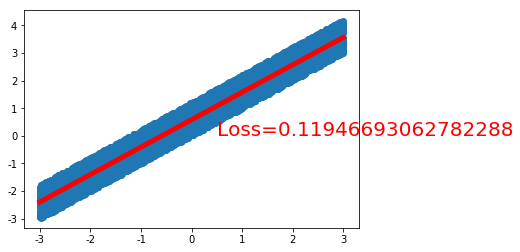

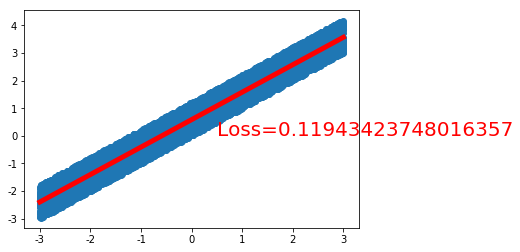

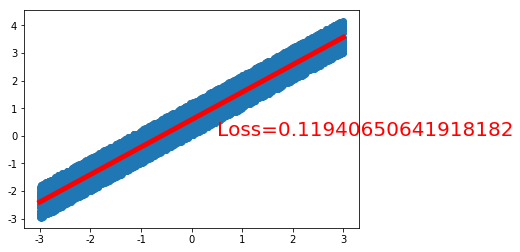

CPU times: user 57.3 s, sys: 24.8 s, total: 1min 22s
Wall time: 34 s


In [18]:
%%time
model, loss = train(x, y, inputs, target, LR_model, 10000)

In [19]:
loss.item()

0.11938287317752838

In [20]:
list(model.parameters())

[Parameter containing:
 tensor([[0.9961]], requires_grad=True), Parameter containing:
 tensor([0.5864], requires_grad=True)]